# <p style="padding:15px;background:yellow;text-align:center;text-decoration:underline">Assigment 7<p>

## - Import Libraries

Import necessary libraries used in these assignment.

In [383]:
import numpy as np
import pandas as pd
import math
import sys
import operator
import matplotlib.pyplot as plt
import matplotlib as mpl

## - Read File (without header) given a delimeter

Reads a file with a given delimeter and returns the converted numpy array.
<br>
Default when no delimeter is given it reads file as in csv format.

In [306]:
def readFile(trainFile,seperator=",",sample=False):
    try:
        data=pd.read_csv(trainFile, sep=seperator, header=None)
        if sample:
            data=data.sample(frac=1)
        return data.values
    except:
        print("Error reading training data file")

## -Train Test split

Given a percentage, it will split out the data into train dataset and test dataset.

In [307]:
def splitTrainTest(data,percent):
    total=len(data)
    trainTotal=int(total*percent*0.01)
    testTotal=total-trainTotal
    return (data[0:trainTotal],data[trainTotal:total])

## Part-3 Linear regression to predict the probablity of getting the admit.

Following **Error Measures** have been used under part-2 of this question

**Mean Absolute Error:**
$$ MAE = \frac{1}{n}\sum_{\forall y}|y_{actual}-y_{predicted} | $$
<hr>

**Mean Square Error:**
$$ MAE = \frac{1}{n}\sum_{\forall y}(y_{actual}-y_{predicted} ){^2} $$

<hr>

**Mean Percentage Error:**
$$ MAE = \frac{100\%}{n}\sum_{\forall y}\frac{(y_{actual}-y_{predicted} )}{y_{actual}} $$


In [308]:
# function return Mean absolute Value
def MAE(testRecords,testYs,predictions):
    error=0
    for actual,predicted in zip(testYs,predictions):
        predicted=predicted[0]
        error+=abs(actual-predicted)
    print("Mean Absolute Error = ",error/len(testYs))

In [309]:
# function return Mean square error
def MSE(testYs,predictions):
    error=0
    for actual,predicted in zip(testYs,predictions):
        predicted=predicted[0]
        error+=(actual-predicted)**2
#     print("Mean Square Error = ",error/len(testYs))
    return error/len(testYs)

In [310]:
# function return Mean percentage error
def MPE(testRecords,testYs,predictions):
    error=0
    for actual,predicted in zip(testYs,predictions):
        predicted=predicted[0]
        error+=(actual-predicted)/actual
    print("Mean Percentage Error = ",100*error/len(testYs))

### 3.1. Predicting probabiliy of getting admit

As we know to calculate the value of dependent variable $Y$ we can use the below general equation:

$$Y=\beta_{0}+\beta_{1}X_1+\beta_{2}X_2+....+\beta_{n}X_n+\epsilon$$

Then using matrix calculus we find that the least square estimate for $\beta$ is given by:

$$B=((X{^T}X){^-1}X{^T}Y)$$

Hence the least square regession line can be given by
$$Y=X\beta$$

In [388]:
def predictProbAdmit(trainFile,percent,independentVariable=[1,2,3,4,5,6,7],targetIndex=8,forGraph=False,testFile=None):
    data=pd.read_csv(trainFile).values
    independentVariable=[0]+independentVariable
    
    train,test=splitTrainTest(data,percent)
    
    if testFile:
        print("Will evaluate test File: ",testFile)
        test=pd.read_csv(testFile).values
    else:
        print("Will evaluate Validation data (20%): ")
    
    testY=test[:,targetIndex]
    trainY=train[:,targetIndex]
    
    test[:,0]=1 #changeing first column to constant so it can be used for intercept
    train[:,0]=1
    
    train=train[:,independentVariable]
    test=test[:,independentVariable]
   
    mseErrorsValid=[]
    mseErrorsTrain=[]
    lambdaVal=[i for i in range(0,200)]
#     lambdaVal=np.linspace(5,15,1000)
    for i in lambdaVal:
        y=np.transpose(np.matrix(trainY))
        X=np.matrix(train)
        XT=np.transpose(X)
        iden=np.identity(XT.shape[0])*i
        iden[0][0]=0
        inverse=np.linalg.inv(XT*X+iden)
        coefficents=inverse*XT*y
        predictedValid=np.array(test*coefficents)
        predictedTrain=np.array(train*coefficents)
#         coefficents=np.array(coefficents)
        mseErrorsValid.append(MSE(testY,predictedValid))
        mseErrorsTrain.append(MSE(trainY,predictedTrain))
    
    plt.figure(figsize=(8,6))
    plt.xlabel('xlabel', fontsize=15)
    plt.ylabel('ylabel', fontsize=15)
    plt.xlabel("regularisation coefficient λ")
    plt.ylabel("Error (MSE)")
    plt.title("Ridge regression",fontsize=15)
    plt.grid(True)
    plt.plot(lambdaVal,mseErrorsValid,color="orange",linewidth="2.4",label="Validation")
    plt.plot(lambdaVal,mseErrorsTrain,color="green",linewidth="2.4",label="Training")
    print(lambdaVal[np.argmin(mseErrorsValid)])
    plt.legend(loc=4,fontsize=15)
    plt.show()


Will evaluate Validation data (20%): 
10


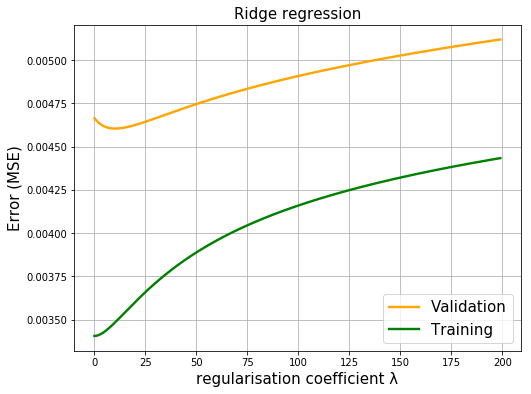

In [389]:
predictProbAdmit(trainFile="AdmissionDataset/data.csv",percent=80)

#with test file as last parameter
# predictProbAdmit("AdmissionDataset/data.csv",80,[1,2,3,4,5,6,7],8,False,"AdmissionDataset/testData.csv")

Will evaluate Validation data (20%): 
1


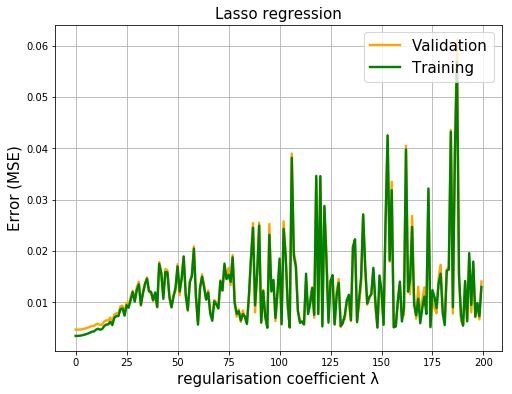

In [390]:
def predictProbAdmitGD(trainFile,percent,independentVariable=[1,2,3,4,5,6,7],targetIndex=8,forGraph=False,testFile=None):
    data=pd.read_csv(trainFile).values
    independentVariable=[0]+independentVariable
    
    train,test=splitTrainTest(data,percent)
    
    if testFile:
        print("Will evaluate test File: ",testFile)
        test=pd.read_csv(testFile).values
    else:
        print("Will evaluate Validation data (20%): ")
    
    
    testY=test[:,targetIndex]
    trainY=train[:,targetIndex]
    
    train=(train-train.mean(axis=0))/(train.std(axis=0))
    test=(test-test.mean(axis=0))/(test.std(axis=0))
    
    test[:,0]=1 #changeing first column to constant so it can be used for intercept
    train[:,0]=1
    
    train=train[:,independentVariable]
    
    test=test[:,independentVariable]
   
    if forGraph:
        test=train
        testY=trainY
        otest=otrain
        
    mseErrorsValid=[]
    mseErrorsTrain=[]
    lambdaVal=[i for i in range(200)]
#     lambdaVal=np.linspace(1,20,200)
    for lambdaV in lambdaVal:
        learningR=0.1
        epochs=1000
        theta=np.zeros((train.shape[1],1))
        m=len(trainY)    

        trainY=trainY.reshape(-1,1)
        testY=testY.reshape(-1,1)

        for i in range(epochs):
            predictions=np.dot(train,theta)
            diff=(predictions-trainY)
            deri=train.T.dot(diff)+lambdaV*np.sign(theta)
            deri[0]=deri[0]-lambdaV*np.sign(theta[0])
            theta=theta-learningR*(deri/m)
#             theta=theta-(1/m)*learningR*(train.T.dot((predictions-trainY))+lambdaV*np.sign(theta))

        predictedTrain=np.dot(train,theta)
        predictedValid=np.dot(test,theta)
        mseErrorsValid.append(MSE(testY,predictedValid))
        mseErrorsTrain.append(MSE(trainY,predictedTrain))
    print(lambdaVal[np.argmin(mseErrorsValid)])
    plt.figure(figsize=(8,6))
    plt.xlabel('xlabel', fontsize=15)
    plt.ylabel('ylabel', fontsize=15)
    plt.xlabel("regularisation coefficient λ")
    plt.ylabel("Error (MSE)")
    plt.grid(True)
    plt.plot(lambdaVal,mseErrorsValid,color="orange",linewidth="2.4",label="Validation")
    plt.plot(lambdaVal,mseErrorsTrain,color="green",linewidth="2.4",label="Training")
    plt.title("Lasso regression",fontsize=15)
    plt.legend(loc=1,fontsize=15)
    plt.show()

predictProbAdmitGD("AdmissionDataset/data.csv",80)

In [391]:
from sklearn.model_selection import KFold
def kFold(trainFile,percent,independentVariable=[1,2,3,4,5,6,7],targetIndex=8,forGraph=False,testFile=None):
    data=pd.read_csv(trainFile).values
    independentVariable=[0]+independentVariable
    
    train,testFinal=splitTrainTest(data,percent)
    
    if testFile:
        testFinal=pd.read_csv(testFile).values
    
    train[:,0]=1
    ######################### K-Folds #####################

#     kValues=[i for i in range(2,len(train)+1)]
    kValues=[i for i in range(2,10)]
    lambdaV=1
    kFoldAvgError=[]
    for k in kValues:
        print(k)
        mseErrorsValid=[]
        mseErrorsTrain=[]
        
        kf = KFold(n_splits=k)
        kf.get_n_splits(train)
        for train_index, test_index in kf.split(train):
#             print("TRAIN:", len(train_index), "TEST:", len(test_index))
            testY=train[test_index,targetIndex]
            trainY=train[train_index,targetIndex]

    #         test[:,0]=1 #changeing first column to constant so it can be used for intercept

            trainX=train[train_index]
            trainX=trainX[:,independentVariable]
            testX=train[test_index]
            testX=testX[:,independentVariable]

            y=np.transpose(np.matrix(trainY))
            X=np.matrix(trainX)
            XT=np.transpose(X)
            iden=np.identity(XT.shape[0])*lambdaV
            iden[0][0]=0
            inverse=np.linalg.inv(XT*X+iden)
            coefficents=inverse*XT*y
            predictedValid=np.array(testX*coefficents)
    #         predictedTrain=np.array(train*coefficents)
            mseErrorsValid.append(MSE(testY,predictedValid))

        kFoldAvgError.append(np.average(mseErrorsValid))
    ######################### K-Folds #####################
    
    plt.figure(figsize=(8,6))
    plt.xlabel('xlabel', fontsize=15)
    plt.ylabel('ylabel', fontsize=15)
    
    plt.title("Errors (MSE) vs k-folds",fontsize=15)
    plt.ylabel("Avg Error (MSE)")
    plt.xlabel("Folds")
    plt.grid(True)
    plt.plot(kValues,kFoldAvgError,color="orange",linewidth="2.4",label="Validation")
#     plt.plot(lambdaVal,mseErrorsTrain,color="green",linewidth="2.4",label="Training")
    plt.legend(loc=4,fontsize=15)
    plt.show()


2
3
4
5
6
7
8
9


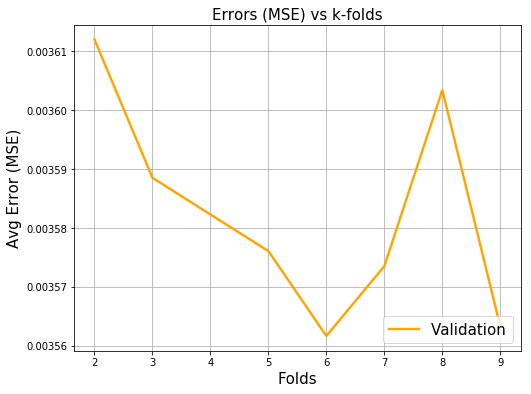

In [392]:
kFold("AdmissionDataset/data.csv",80)

In [393]:
from sklearn.model_selection import KFold
def leaveOneOut(trainFile,percent,independentVariable=[1,2,3,4,5,6,7],targetIndex=8,forGraph=False,testFile=None):
    data=pd.read_csv(trainFile).values
    independentVariable=[0]+independentVariable
    
    train,testFinal=splitTrainTest(data,percent)
    
    if testFile:
        testFinal=pd.read_csv(testFile).values
    
    train[:,0]=1
    plt.figure(figsize=(8,6))
    ######################### K-Folds #####################

    kValues=[len(train)]
    lambdaV=1
    kFoldAvgError=[]
    for k in kValues:
        print(k)
        mseErrorsValid=[]
        mseErrorsTrain=[]
        
        kf = KFold(n_splits=k)
        kf.get_n_splits(train)
        
        for train_index, test_index in kf.split(train):
            testY=train[test_index,targetIndex]
            trainY=train[train_index,targetIndex]

            trainX=train[train_index]
            trainX=trainX[:,independentVariable]
            testX=train[test_index]
            testX=testX[:,independentVariable]

            y=np.transpose(np.matrix(trainY))
            X=np.matrix(trainX)
            XT=np.transpose(X)
            iden=np.identity(XT.shape[0])*lambdaV
            iden[0][0]=0
            inverse=np.linalg.inv(XT*X+iden)
            coefficents=inverse*XT*y
            predictedValid=np.array(testX*coefficents)
    #         predictedTrain=np.array(train*coefficents)
            mse=MSE(testY,predictedValid)
            mseErrorsValid.append(mse)
#             print(MSE(testY,predictedValid))
            plt.plot([i for i in range(100)],[mse]*100,color="cyan",linewidth="2.4")
        kFoldAvgError.append(np.average(mseErrorsValid))
    ######################### K-Folds #####################
    print(kFoldAvgError)
    
    plt.xlabel('xlabel', fontsize=15)
    plt.ylabel('ylabel', fontsize=15)
    plt.title("Leave one out cross validation",fontsize=15)
    plt.ylabel("Avg Error (MSE)")
    plt.xlabel("Folds")
    plt.grid(True)
    plt.plot([i for i in range(100)],kFoldAvgError*100,color="black",linewidth="2.4",label="Average Error")
#     plt.plot(lambdaVal,mseErrorsTrain,color="green",linewidth="2.4",label="Training")
    plt.legend(loc=1,fontsize=15)
    plt.show()


360
[0.00357052719248073]


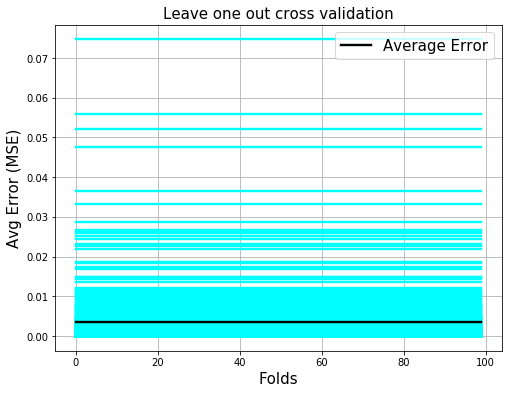

In [394]:
leaveOneOut("AdmissionDataset/data.csv",80)